In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [22]:
num_of_train = 1000
scale_size = 100
canny_thres1 = 100
canny_thres2 = 200
kmeans_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
hist = np.zeros((256,1))
hist_b = np.zeros((256,1))
hist_g = np.zeros((256,1))
hist_r = np.zeros((256,1))
edge_mask = np.uint8(np.ones((100,100)))
edge_heatmap = np.float64(np.zeros((100,100)))
print(type(hist[0][0]))

<class 'numpy.float64'>


In [23]:
# standardize the size
for i in range(1,num_of_train+1):
    img = cv2.imread('dataset/training_set/cats/cat.'+str(i)+'.jpg')
    scaled = cv2.resize(img, (scale_size, scale_size), interpolation=cv2.INTER_AREA)
    #reduce noise with Gaussian Blur, kernal size = (5,5)
    blur = cv2.GaussianBlur(scaled, (5,5), 1)
    #gray image
    gray = cv2.cvtColor(scaled,cv2.COLOR_BGR2GRAY)
    #color quantization
    ret,label,center=cv2.kmeans(np.float32(scaled.reshape((-1,3))),K,None,kmeans_criteria,8,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((scaled.shape))
    
    #edge
    edge = cv2.Canny(blur,canny_thres1,canny_thres2)
    edge_heatmap = edge_heatmap + np.where(edge > 0, 1, 0)
    #histogram
    hist = hist + (cv2.calcHist([gray], [0], None, [256], [0, 256])/num_of_train)
    hist_b = hist_b + (cv2.calcHist([res2],[0],None,[256],[0,256])/num_of_train)
    hist_g = hist_g + (cv2.calcHist([res2],[1],None,[256],[0,256])/num_of_train)
    hist_r = hist_r + (cv2.calcHist([res2],[2],None,[256],[0,256])/num_of_train)
    


In [24]:
print(hist.shape, edge.shape)

(256, 1) (100, 100)


(0.0, 256.0)

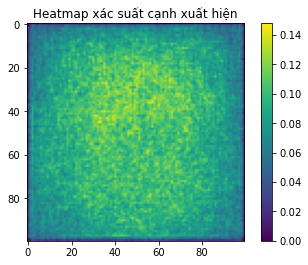

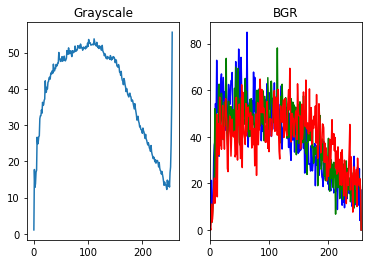

In [34]:
plt.imshow(edge_heatmap/num_of_train)
plt.colorbar()
plt.title('Heatmap xác suất cạnh xuất hiện')
plt.figure()
plt.subplot(121)
plt.title('Grayscale')
plt.plot(hist)
plt.subplot(122)
plt.plot(hist_b, color = 'b')
plt.plot(hist_g, color = 'g')
plt.plot(hist_r, color = 'r')
plt.title('BGR')
plt.xlim([0,256])

In [ ]:
test = cv2.imread()